In [1]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse
import matplotlib.patheffects as patheffects
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.io import fits
from astropy.visualization import (AsinhStretch, LinearStretch, ImageNormalize)
import scipy
from tqdm import tqdm
from scipy.stats import norm
from scipy.integrate import simpson

import frank
from frank.radial_fitters import FrankFitter
from frank.geometry import FixedGeometry
from frank.utilities import convolve_profile, sweep_profile
from frank.io import save_fit, load_sol
from frank.make_figs import make_full_fig
sys.path.append('..')
import diskdictionary as disk
arcsec = 1/3600 * np.pi/180
deg = np.pi/180

In [3]:
target = 'AA_Tau'
target_label = disk.disk[target]['label']

In [5]:
int_bootstrap = np.loadtxt('Int_bootstrap.txt')
n_iter = int_bootstrap.shape[0]
int_bootstrap.shape

(479, 400)

In [7]:
r_bootstrap = np.loadtxt('R_bootstrap.txt')
r_bootstrap.shape

(400,)

In [9]:
# Load frank fit
sol = load_sol(f'../fits/{target}_frank_sol.obj')
r_frank_bestfit = sol.r
Inu_frank_bestfit = sol.I

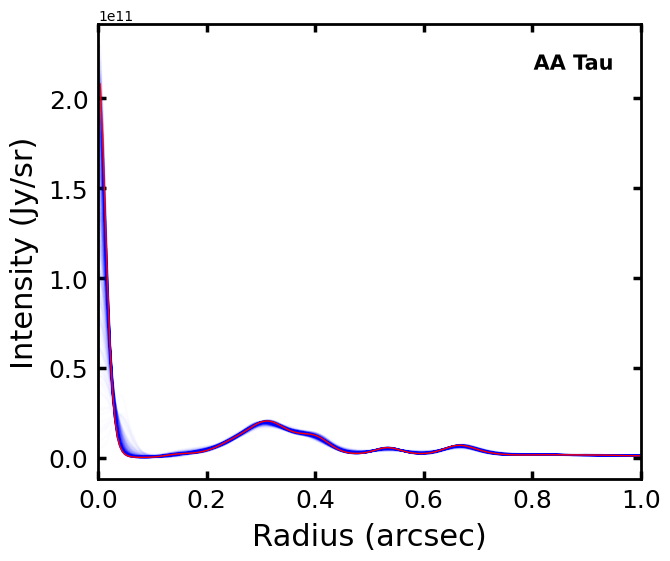

In [11]:
fig = plt.figure(figsize=(7, 5.9))
ax = fig.add_subplot(111)

for i in range(n_iter):
    plt.plot(r_bootstrap, int_bootstrap[i], color='b', alpha=0.01)

#ax.vlines(r_bootstrap[index], 0, 2.5e10)

ax.plot(r_frank_bestfit,Inu_frank_bestfit, color='r', linewidth=1)

ax.text(0.95, 0.9, s=target_label,ha='right',
        transform=ax.transAxes, color='k', fontsize=15, fontweight='bold',
        path_effects=[patheffects.withStroke(linewidth=5, foreground="w")])

ax.set_xlim(0,1)

ax.tick_params(which='major',axis='both',right=True,top=True, labelsize=18, pad=7,width=2.5, length=6,direction='in',color='k')
ax.tick_params(which='minor',axis='both',right=True,top=True, labelsize=18, pad=7,width=1.5, length=4,direction='in',color='k')
ax.set_ylabel(r'Intensity (Jy/sr)', fontsize = 22, labelpad=7)
ax.set_xlabel(r'Radius (arcsec)', fontsize = 22, labelpad=7)


for side in ax.spines.keys():
    ax.spines[side].set_linewidth(2) 

plt.show()

0.6940333950639752


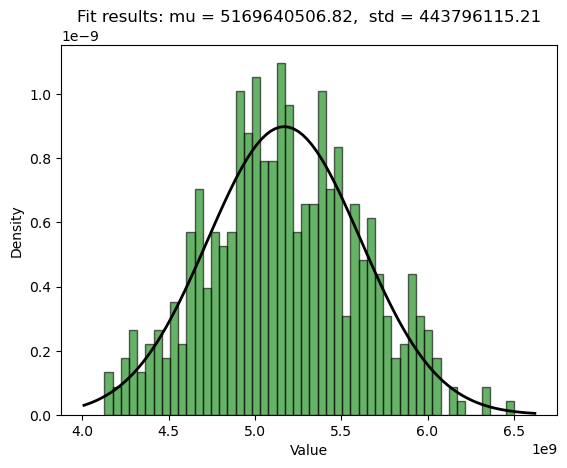

In [13]:
i=150
print(r_bootstrap[i])
data = int_bootstrap[:,i]

# Plot the histogram of the data
plt.hist(data, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# Plot the Gaussian fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add title and labels
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')

# Show plot
plt.show()

In [15]:
sigmas = []
mus = []
for i in range(int_bootstrap.shape[1]):
    data = int_bootstrap[:,i]
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    mus.append(mu)
    sigmas.append(std)

mus = np.asarray(mus)
sigmas = np.asarray(sigmas)

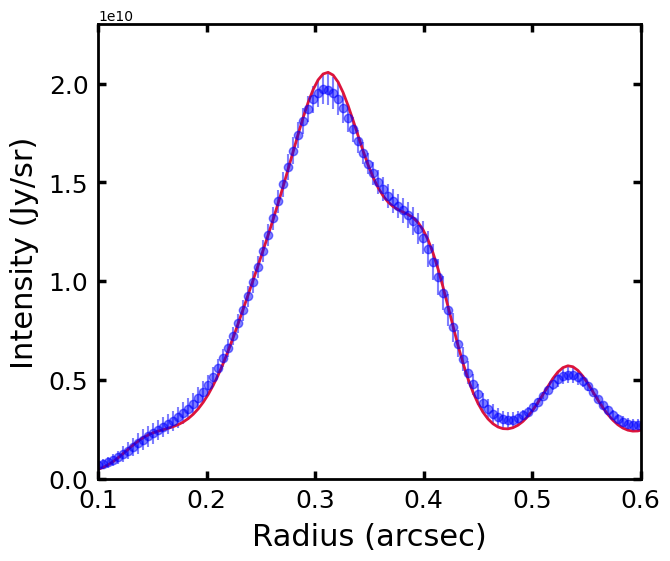

In [17]:
fig = plt.figure(figsize=(7, 5.9))
ax = fig.add_subplot(111)

#for i in range(n_iter):
#    plt.plot(r_bootstrap, int_bootstrap[i], color='b', alpha=0.01)


ax.errorbar(r_frank_bestfit,mus, sigmas, fmt='o', alpha=0.5, color='b')
ax.plot(r_frank_bestfit,Inu_frank_bestfit, color='crimson', linewidth=2)
ax.set_xlim(0.1,0.6)
ax.set_ylim(0.,0.23e11)

ax.tick_params(which='major',axis='both',right=True,top=True, labelsize=18, pad=7,width=2.5, length=6,direction='in',color='k')
ax.tick_params(which='minor',axis='both',right=True,top=True, labelsize=18, pad=7,width=1.5, length=4,direction='in',color='k')
ax.set_ylabel(r'Intensity (Jy/sr)', fontsize = 22, labelpad=7)
ax.set_xlabel(r'Radius (arcsec)', fontsize = 22, labelpad=7)


for side in ax.spines.keys():
    ax.spines[side].set_linewidth(2) 

plt.show()

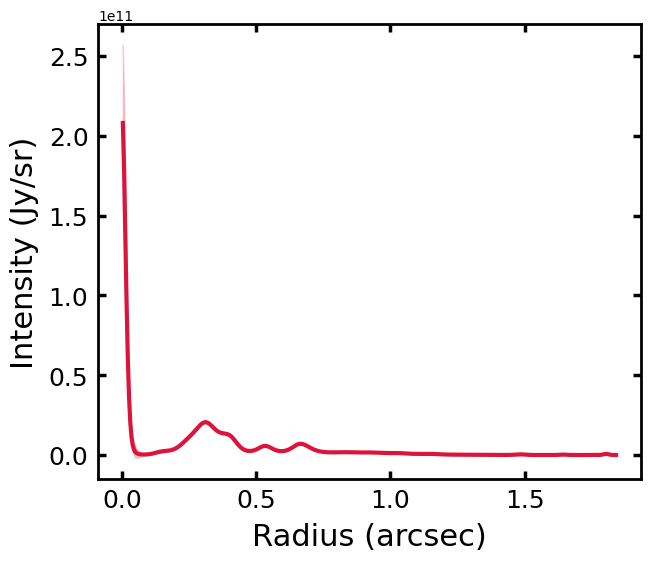

In [19]:
fig = plt.figure(figsize=(7, 5.9))
ax = fig.add_subplot(111)

#for i in range(n_iter):
#    plt.plot(r_bootstrap, int_bootstrap[i], color='b', alpha=0.01)

plt.plot(r_frank_bestfit,Inu_frank_bestfit, color='crimson', alpha=1, lw=3)
plt.fill_between(r_frank_bestfit, Inu_frank_bestfit-sigmas, Inu_frank_bestfit+sigmas, color='crimson', alpha=0.2)
#ax.errorbar(r_frank_bestfit,mus, sigmas, fmt='o', alpha=0.2, color='b')

#ax.set_xlim(0.1,0.6)
#ax.set_ylim(3e7,5e11)

#ax.set_yscale('log')

ax.tick_params(which='major',axis='both',right=True,top=True, labelsize=18, pad=7,width=2.5, length=6,direction='in',color='k')
ax.tick_params(which='minor',axis='both',right=True,top=True, labelsize=18, pad=7,width=1.5, length=4,direction='in',color='k')
ax.set_ylabel(r'Intensity (Jy/sr)', fontsize = 22, labelpad=7)
ax.set_xlabel(r'Radius (arcsec)', fontsize = 22, labelpad=7)


for side in ax.spines.keys():
    ax.spines[side].set_linewidth(2) 

plt.show()

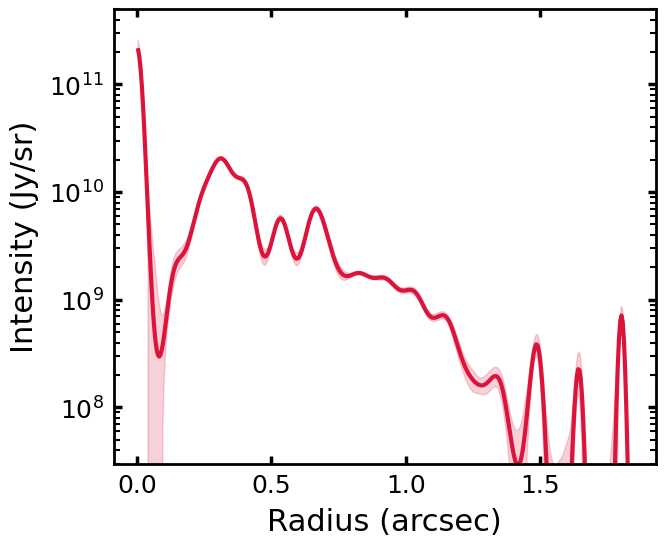

In [21]:
fig = plt.figure(figsize=(7, 5.9))
ax = fig.add_subplot(111)

#for i in range(n_iter):
#    plt.plot(r_bootstrap, int_bootstrap[i], color='b', alpha=0.01)

plt.plot(r_frank_bestfit,Inu_frank_bestfit, color='crimson', alpha=1, lw=3)
plt.fill_between(r_frank_bestfit, Inu_frank_bestfit-sigmas, Inu_frank_bestfit+sigmas, color='crimson', alpha=0.2)
#ax.errorbar(r_frank_bestfit,mus, sigmas, fmt='o', alpha=0.2, color='b')

#ax.set_xlim(0.1,0.6)
ax.set_ylim(3e7,5e11)

ax.set_yscale('log')

ax.tick_params(which='major',axis='both',right=True,top=True, labelsize=18, pad=7,width=2.5, length=6,direction='in',color='k')
ax.tick_params(which='minor',axis='both',right=True,top=True, labelsize=18, pad=7,width=1.5, length=4,direction='in',color='k')
ax.set_ylabel(r'Intensity (Jy/sr)', fontsize = 22, labelpad=7)
ax.set_xlabel(r'Radius (arcsec)', fontsize = 22, labelpad=7)


for side in ax.spines.keys():
    ax.spines[side].set_linewidth(2) 

plt.show()

In [23]:
# frank profile
np.savetxt(f'{target}_uncertainty_frank_profile.txt',
           sigmas,
           fmt='%10.6e', delimiter='\t',
           header=f'Uncertainty of the intensity radial profile from bootstrapping the frank fit of {target}. Unit is in Jy/sr')

# Calculate R68, R90, R95 with errors

In [26]:
R68_arcsec_bootstrap = []
R90_arcsec_bootstrap = []
R95_arcsec_bootstrap = [] 
tot_flux_bootstrap = []
for i in tqdm(range(int_bootstrap.shape[0])):
    
    r_frank = r_frank_bestfit
    Inu_frank = int_bootstrap[i]
    
    integrand  = 2*np.pi*r_frank*arcsec*Inu_frank
    tot_flux_bootstrap.append(simpson(integrand, r_frank*arcsec) * np.cos(disk.disk[target]['incl']*deg) *1e3)
    cumulative = np.cumsum(integrand)
    norm_numerical_cumulative = np.cumsum(integrand)/np.amax(np.cumsum(integrand))

    cumulative_tot_flux = np.zeros(integrand.shape[0])
    for i in range(1, integrand.shape[0]):
        cumulative_tot_flux[i] = simpson(integrand[:i], r_frank[:i]*arcsec) * np.cos(disk.disk[target]['incl']*deg) *1e3
    norm_cumulative_tot_flux = cumulative_tot_flux / np.amax(cumulative_tot_flux)
    
    R68_arcsec_bootstrap.append(r_frank[np.where(norm_cumulative_tot_flux <= 0.68)[0][-1]])
    R90_arcsec_bootstrap.append(r_frank[np.where(norm_cumulative_tot_flux <= 0.90)[0][-1]])
    R95_arcsec_bootstrap.append(r_frank[np.where(norm_cumulative_tot_flux <= 0.95)[0][-1]])

R68_arcsec_bootstrap = np.asarray(R68_arcsec_bootstrap)
R90_arcsec_bootstrap = np.asarray(R90_arcsec_bootstrap)
R95_arcsec_bootstrap = np.asarray(R95_arcsec_bootstrap)
tot_flux_bootstrap = np.asarray(tot_flux_bootstrap)

100%|█████████████████████████████████████████| 479/479 [00:07<00:00, 62.09it/s]


In [28]:
# bestfit values
r_frank = r_frank_bestfit
Inu_frank = Inu_frank_bestfit

integrand  = 2*np.pi*r_frank*arcsec*Inu_frank

tot_flux_bestfit =  simpson(integrand, r_frank*arcsec) * np.cos(disk.disk[target]['incl']*deg) *1e3
lerr_tot_flux = np.percentile(tot_flux_bootstrap, 50)-np.percentile(tot_flux_bootstrap, 16)
uerr_tot_flux = np.percentile(tot_flux_bootstrap, 84)-np.percentile(tot_flux_bootstrap, 50)
print(f"frank total flux density = {tot_flux_bestfit:.1f} + {uerr_tot_flux:.1f} - {lerr_tot_flux:.1f} mJy")

cumulative = np.cumsum(integrand)
norm_numerical_cumulative = np.cumsum(integrand)/np.amax(np.cumsum(integrand))

cumulative_tot_flux = np.zeros(integrand.shape[0])
for i in range(1, integrand.shape[0]):
    cumulative_tot_flux[i] = simpson(integrand[:i], r_frank[:i]*arcsec) * np.cos(disk.disk[target]['incl']*deg) *1e3
norm_cumulative_tot_flux = cumulative_tot_flux / np.amax(cumulative_tot_flux)

distance_pc = disk.disk[target]['distance']

R68_arcsec_bestfit = r_frank[np.where(norm_cumulative_tot_flux <= 0.68)[0][-1]]
R90_arcsec_bestfit = r_frank[np.where(norm_cumulative_tot_flux <= 0.90)[0][-1]]
R95_arcsec_bestfit = r_frank[np.where(norm_cumulative_tot_flux <= 0.95)[0][-1]]
R68_au_bestfit, R90_au_bestfit, R95_au_bestfit = R68_arcsec_bestfit*distance_pc, R90_arcsec_bestfit*distance_pc, R95_arcsec_bestfit*distance_pc
R68_au_bootstrap, R90_au_bootstrap, R95_au_bootstrap = R68_arcsec_bootstrap*distance_pc, R90_arcsec_bootstrap*distance_pc, R95_arcsec_bootstrap*distance_pc

Rarr_arcsec_bestfit = np.array([R68_arcsec_bestfit, R90_arcsec_bestfit, R95_arcsec_bestfit])
Rarr_au_bestfit = Rarr_arcsec_bestfit * distance_pc

lerr_Rarr_arcsec = np.array([np.percentile(R68_arcsec_bootstrap, 50)-np.percentile(R68_arcsec_bootstrap, 16), np.percentile(R90_arcsec_bootstrap, 50)-np.percentile(R90_arcsec_bootstrap, 16), np.percentile(R95_arcsec_bootstrap, 50)-np.percentile(R95_arcsec_bootstrap, 16)])
uerr_Rarr_arcsec = np.array([np.percentile(R68_arcsec_bootstrap, 84)-np.percentile(R68_arcsec_bootstrap, 50), np.percentile(R90_arcsec_bootstrap, 84)-np.percentile(R90_arcsec_bootstrap, 50), np.percentile(R95_arcsec_bootstrap, 84)-np.percentile(R95_arcsec_bootstrap, 50)])
lerr_Rarr_au = np.array([np.percentile(R68_au_bootstrap, 50)-np.percentile(R68_au_bootstrap, 16), np.percentile(R90_au_bootstrap, 50)-np.percentile(R90_au_bootstrap, 16), np.percentile(R95_au_bootstrap, 50)-np.percentile(R95_au_bootstrap, 16)])
uerr_Rarr_au = np.array([np.percentile(R68_au_bootstrap, 84)-np.percentile(R68_au_bootstrap, 50), np.percentile(R90_au_bootstrap, 84)-np.percentile(R90_au_bootstrap, 50), np.percentile(R95_au_bootstrap, 84)-np.percentile(R95_au_bootstrap, 50)])

lerr_tot_flux = np.percentile(tot_flux_bootstrap, 50)-np.percentile(tot_flux_bootstrap, 16)
uerr_tot_flux = np.percentile(tot_flux_bootstrap, 50)-np.percentile(tot_flux_bootstrap, 16)

#######################


ltx_68_au = f'${Rarr_au_bestfit[0]:.1f}_{{{lerr_Rarr_au[0]:.1f}}}^{{{uerr_Rarr_au[0]:.1f}}}$'
ltx_68_mas = f'${Rarr_arcsec_bestfit[0]*1e3:.0f}_{{{lerr_Rarr_arcsec[0]*1e3:.0f}}}^{{{uerr_Rarr_arcsec[0]*1e3:.0f}}}$'

ltx_90_au = f'${Rarr_au_bestfit[1]:.1f}_{{{lerr_Rarr_au[1]:.1f}}}^{{{uerr_Rarr_au[1]:.1f}}}$'
ltx_90_mas = f'${Rarr_arcsec_bestfit[1]*1e3:.0f}_{{{lerr_Rarr_arcsec[1]*1e3:.0f}}}^{{{uerr_Rarr_arcsec[1]*1e3:.0f}}}$'

ltx_95_au = f'${Rarr_au_bestfit[2]:.1f}_{{{lerr_Rarr_au[2]:.1f}}}^{{{uerr_Rarr_au[2]:.1f}}}$'
ltx_95_mas = f'${Rarr_arcsec_bestfit[2]*1e3:.0f}_{{{lerr_Rarr_arcsec[2]*1e3:.0f}}}^{{{uerr_Rarr_arcsec[2]*1e3:.0f}}}$'

print(' ')
print(f'{ltx_68_au}, {ltx_68_mas}  &  {ltx_90_au}, {ltx_90_mas}  &  {ltx_95_au}, {ltx_95_mas}')

print(' ')
print(f"R_68 = {Rarr_arcsec_bestfit[0]*1e3:.1f} + {uerr_Rarr_arcsec[0]*1e3:.1f} - {lerr_Rarr_arcsec[0]*1e3:.1f} mas = {Rarr_au_bestfit[0]:.1f} + {uerr_Rarr_au[0]:.1f} - {lerr_Rarr_au[0]:.1f} au ")
print(f"R_90 = {Rarr_arcsec_bestfit[1]*1e3:.1f} + {uerr_Rarr_arcsec[1]*1e3:.1f} - {lerr_Rarr_arcsec[1]*1e3:.1f} mas = {Rarr_au_bestfit[1]:.1f} + {uerr_Rarr_au[1]:.1f} - {lerr_Rarr_au[1]:.1f} au ")
print(f"R_95 = {Rarr_arcsec_bestfit[2]*1e3:.1f} + {uerr_Rarr_arcsec[2]*1e3:.1f} - {lerr_Rarr_arcsec[2]*1e3:.1f} mas = {Rarr_au_bestfit[2]:.1f} + {uerr_Rarr_au[2]:.1f} - {lerr_Rarr_au[2]:.1f} au ")



############

np.savetxt(f'{target}_continuum_radii_frank_fit_bootstrap.txt',
           np.row_stack([Rarr_au_bestfit, Rarr_arcsec_bestfit, lerr_Rarr_au, uerr_Rarr_au, lerr_Rarr_arcsec, uerr_Rarr_arcsec]),
           fmt='%.4g', delimiter='\t',
           header=f'Continuum radii from frank profile of {target}\nColumns: R68   R90   R95   \n1st row: median (au)\n2nd row: median (arcsec)\n3rd row: lower error (au)\n4th row: upper error (au)\n5th row: lower error (arcsec)\n6th row: upper error (arcsec)'
          )

$92.2_{0.6}^{1.2}$, $685_{5}^{9}$  &  $139.4_{1.2}^{1.2}$, $1035_{9}^{9}$  &  $158.6_{1.2}^{2.2}$, $1177_{9}^{16}$
